In [1]:
!git clone https://github.com/microsoft/table-transformer
!cd table-transformer



Cloning into 'table-transformer'...
remote: Enumerating objects: 753, done.
remote: Counting objects: 100% (379/379), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 753 (delta 334), reused 300 (delta 300), pack-reused 374 (from 1)
Receiving objects: 100% (753/753), 350.80 KiB | 2.45 MiB/s, done.
Resolving deltas: 100% (467/467), done.


In [ ]:
!pip install -r requirements.txt


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [2]:
!cd table-transformer

In [3]:
!pip install pdf2image

In [7]:
!pip install transformers

In [5]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 18.6 MB/s eta 0:00:00


In [ ]:
!pip


Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper c

In [6]:
import torch
from transformers import TableTransformerForObjectDetection, AutoTokenizer
from pdf2image import convert_from_path
import pandas as pd

# Load the pre-trained TATR model and tokenizer
model_name = "microsoft/table-transformer-detection"
model = TableTransformerForObjectDetection.from_pretrained(model_name)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
# Convert PDF pages to images
def convert_pdf_to_images(pdf_path, dpi=300):
    images = convert_from_path(pdf_path, dpi=dpi)
    return images


In [9]:
from PIL import Image
import torch

# Function to run table detection using the TATR model
def run_table_detection(image, model):
    inputs = tokenizer(images=image, return_tensors="pt")

    # Forward pass through the model
    outputs = model(**inputs)

    # Process model outputs
    table_boxes = outputs.pred_boxes
    return table_boxes

# Function to extract tables from images
def extract_tables_from_images(images, model):
    table_data = []
    for image in images:
        boxes = run_table_detection(image, model)
        table_data.append(boxes)
    return table_data


In [10]:
# Function to save the extracted tables to CSV
def save_tables_to_csv(tables, output_path):
    for i, table in enumerate(tables):
        table_df = pd.DataFrame(table)  # Convert table data to DataFrame
        csv_filename = f"{output_path}/table_{i+1}.csv"
        table_df.to_csv(csv_filename, index=False)
        print(f"Table {i+1} saved to {csv_filename}")

# Function to save the extracted tables to Excel
def save_tables_to_excel(tables, output_path):
    writer = pd.ExcelWriter(f"{output_path}/tables_output.xlsx")
    for i, table in enumerate(tables):
        table_df = pd.DataFrame(table)
        table_df.to_excel(writer, sheet_name=f'Table_{i+1}', index=False)
    writer.save()
    print("Tables saved to Excel file.")


In [11]:
!apt-get install -y poppler-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 0s (755 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123620 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.5_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.5) ...
Setting up poppler-utils (22.02.0-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
# Complete pipeline for extracting tables from PDF and saving as CSV/Excel
def extract_tables_from_pdf(pdf_path, output_dir, model):
    # Convert PDF pages to images
    images = convert_pdf_to_images(pdf_path)

    # Extract tables from images
    extracted_tables = extract_tables_from_images(images, model)

    # Save tables to CSV or Excel
    save_tables_to_csv(extracted_tables, output_dir)
    save_tables_to_excel(extracted_tables, output_dir)

# Path to the PDF file
pdf_path = "/content/sample_data/1.pdf"
output_dir = "/content/sample_data/output"

# Extract tables and save them
extract_tables_from_pdf(pdf_path, output_dir, model)


NameError: name 'model' is not defined

In [12]:
import torch
from transformers import TableTransformerForObjectDetection, DetrImageProcessor
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import os

# Function to run table detection using the TATR model
def run_table_detection(image, model, processor):
    inputs = processor(images=image, return_tensors="pt")

    # Forward pass through the model
    outputs = model(**inputs)

    # Get predicted boxes
    target_sizes = torch.tensor([image.size[::-1]])
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

    return results

# Function to extract tables from a PDF
def extract_tables_from_pdf(pdf_path, output_dir, model, processor):
    # Convert PDF pages to images
    images = convert_from_path(pdf_path)

    for page_number, image in enumerate(images):
        # Run table detection on each page
        results = run_table_detection(image, model, processor)

        # Plot detected tables
        fig, ax = plt.subplots(1, figsize=(16, 10))
        ax.imshow(image)

        for box in results['boxes'].detach().numpy():  # Detach tensor before converting to numpy
            ax.add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                       fill=False, color="red", linewidth=3))

        plt.axis('off')
        plt.savefig(os.path.join(output_dir, f"page_{page_number+1}_tables.png"))
        plt.close()

# Load the Table Transformer model and image processor
model_name = "microsoft/table-transformer-detection"
model = TableTransformerForObjectDetection.from_pretrained(model_name)
processor = DetrImageProcessor.from_pretrained(model_name)

# Paths
pdf_path = "/content/sample_data/1.pdf"  # Example PDF path
output_dir = "/content/output_tables"    # Directory to save detected tables

# Create output directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Extract tables and save them
extract_tables_from_pdf(pdf_path, output_dir, model, processor)

print(f"Table extraction completed! Tables are saved in {output_dir}")


Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Table extraction completed! Tables are saved in /content/output_tables


In [13]:
import torch
from transformers import TableTransformerForObjectDetection, DetrImageProcessor
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import os

# Function to enlarge the bounding box
def enlarge_box(box, scale_factor=1.4):
    # Center of the box
    x_center = (box[0] + box[2]) / 2
    y_center = (box[1] + box[3]) / 2
    width = (box[2] - box[0]) * scale_factor
    height = (box[3] - box[1]) * scale_factor

    # New coordinates
    x_min = x_center - width / 2
    y_min = y_center - height / 2
    x_max = x_center + width / 2
    y_max = y_center + height / 2

    return [x_min, y_min, x_max, y_max]

# Function to run table detection using the TATR model
def run_table_detection(image, model, processor):
    inputs = processor(images=image, return_tensors="pt")

    # Forward pass through the model
    outputs = model(**inputs)

    # Get predicted boxes
    target_sizes = torch.tensor([image.size[::-1]])
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

    return results

# Function to extract tables from a PDF
def extract_tables_from_pdf(pdf_path, output_dir, model, processor, scale_factor=1.2):
    # Convert PDF pages to images
    images = convert_from_path(pdf_path)

    for page_number, image in enumerate(images):
        # Run table detection on each page
        results = run_table_detection(image, model, processor)

        # Plot detected tables
        fig, ax = plt.subplots(1, figsize=(16, 10))
        ax.imshow(image)

        for box in results['boxes'].detach().numpy():  # Detach tensor before converting to numpy
            # Enlarge the bounding box by the scale factor
            enlarged_box = enlarge_box(box, scale_factor)

            # Add rectangle to the plot for the detected table
            ax.add_patch(plt.Rectangle((enlarged_box[0], enlarged_box[1]), enlarged_box[2] - enlarged_box[0], enlarged_box[3] - enlarged_box[1],
                                       fill=False, color="red", linewidth=3))

        plt.axis('off')
        plt.savefig(os.path.join(output_dir, f"page_{page_number+1}_tables.png"))
        plt.close()

# Load the Table Transformer model and image processor
model_name = "microsoft/table-transformer-detection"
model = TableTransformerForObjectDetection.from_pretrained(model_name)
processor = DetrImageProcessor.from_pretrained(model_name)

# Paths
pdf_path = "/content/sample_data/1.pdf"  # Example PDF path
output_dir = "/content/enlargeoutput_table"    # Directory to save detected tables

# Create output directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Extract tables and save them
extract_tables_from_pdf(pdf_path, output_dir, model, processor, scale_factor=1.2)

print(f"Table extraction completed! Enlarged tables are saved in {output_dir}")


Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Table extraction completed! Enlarged tables are saved in /content/enlargeoutput_table


In [15]:
!pip install pytesseract

In [16]:
import os
import torch
from transformers import TableTransformerForObjectDetection, DetrImageProcessor
from pdf2image import convert_from_path
import pytesseract
from PIL import Image
import pandas as pd

# Function to run table detection using the TATR model
def run_table_detection(image, model, processor):
    inputs = processor(images=image, return_tensors="pt")
    outputs = model(**inputs)

    # Get predicted boxes
    target_sizes = torch.tensor([image.size[::-1]])
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]
    return results



# Function to crop detected table regions and save as images
def crop_and_save_tables(image, results, output_dir, page_number):
    tables_data = []
    for i, box in enumerate(results['boxes'].detach().numpy()):
        # Crop the detected table region

        cropped_image = image.crop((box[0], box[1], box[2], box[3]))
        cropped_image_path = os.path.join(output_dir, f"page_{page_number+1}_table_{i+1}.png")
        cropped_image.save(cropped_image_path)

        # Convert cropped table image to text using OCR (Tesseract)
        table_text = pytesseract.image_to_string(cropped_image, config="--psm 6")
        tables_data.append(table_text)
    return tables_data

# Function to extract tables from a PDF and save them as CSV or Excel
def extract_tables_to_excel(pdf_path, output_dir, model, processor):
    images = convert_from_path(pdf_path)
    all_tables = []

    for page_number, image in enumerate(images):
        results = run_table_detection(image, model, processor)
        tables_data = crop_and_save_tables(image, results, output_dir, page_number)

        for table_text in tables_data:
            table_rows = [row.split() for row in table_text.splitlines() if row.strip()]
            all_tables.extend(table_rows)

    df = pd.DataFrame(all_tables)
    output_file_path = os.path.join(output_dir, "extracted_tables.xlsx")
    df.to_excel(output_file_path, index=False)
    return output_file_path

# Load the Table Transformer model and image processor
model_name = "microsoft/table-transformer-detection"
model = TableTransformerForObjectDetection.from_pretrained(model_name)
processor = DetrImageProcessor.from_pretrained(model_name)

# Paths
pdf_path = '/content/sample_data/1.pdf'  # Replace with the actual uploaded PDF path
output_dir = '/content/sample_data/output'

# Create output directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Install tesseract-ocr if not installed
!apt-get install -y tesseract-ocr

# Extract tables and save them as Excel
output_file = extract_tables_to_excel(pdf_path, output_dir, model, processor)

# Provide the generated Excel file to the user
output_file


Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,263 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123650 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

'/content/sample_data/output/extracted_tables.xlsx'

In [17]:
import os
import torch
from transformers import TableTransformerForObjectDetection, DetrImageProcessor
from pdf2image import convert_from_path
import pytesseract
from PIL import Image
import pandas as pd

# Function to enlarge the bounding box
def enlarge_box(box, scale_factor=1.2):
    # Center of the box
    x_center = (box[0] + box[2]) / 2
    y_center = (box[1] + box[3]) / 2
    width = (box[2] - box[0]) * scale_factor
    height = (box[3] - box[1]) * scale_factor

    # New coordinates
    x_min = x_center - width / 2
    y_min = y_center - height / 2
    x_max = x_center + width / 2
    y_max = y_center + height / 2

    return [x_min, y_min, x_max, y_max]

# Function to run table detection using the TATR model
def run_table_detection(image, model, processor):
    inputs = processor(images=image, return_tensors="pt")
    outputs = model(**inputs)

    # Get predicted boxes
    target_sizes = torch.tensor([image.size[::-1]])
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]
    return results

# Function to crop detected table regions, enlarge, and save as images
def crop_and_save_tables(image, results, output_dir, page_number, scale_factor=1.2):
    tables_data = []
    for i, box in enumerate(results['boxes'].detach().numpy()):
        # Enlarge the detected table box
        enlarged_box = enlarge_box(box, scale_factor)

        # Crop the enlarged table region
        cropped_image = image.crop((enlarged_box[0], enlarged_box[1], enlarged_box[2], enlarged_box[3]))
        cropped_image_path = os.path.join(output_dir, f"page_{page_number+1}_table_{i+1}.png")
        cropped_image.save(cropped_image_path)

        # Convert cropped table image to text using OCR (Tesseract)
        table_text = pytesseract.image_to_string(cropped_image, config="--psm 6")
        tables_data.append(table_text)
    return tables_data

# Function to extract tables from a PDF and save them as CSV or Excel
def extract_tables_to_excel(pdf_path, output_dir, model, processor, scale_factor=1.2):
    images = convert_from_path(pdf_path)
    all_tables = []

    for page_number, image in enumerate(images):
        results = run_table_detection(image, model, processor)
        tables_data = crop_and_save_tables(image, results, output_dir, page_number, scale_factor)

        for table_text in tables_data:
            table_rows = [row.split() for row in table_text.splitlines() if row.strip()]
            all_tables.extend(table_rows)

    df = pd.DataFrame(all_tables)
    output_file_path = os.path.join(output_dir, "extracted_tables.xlsx")
    df.to_excel(output_file_path, index=False)
    return output_file_path

# Load the Table Transformer model and image processor
model_name = "microsoft/table-transformer-detection"
model = TableTransformerForObjectDetection.from_pretrained(model_name)
processor = DetrImageProcessor.from_pretrained(model_name)

# Paths
pdf_path = '/content/sample_data/1.pdf'  # Replace with the actual uploaded PDF path
output_dir = '/content/sample_data/enlargeoutput'

# Create output directory if it does not exist
if not os.makedirs(output_dir, exist_ok=True):
    print(f"Directory {output_dir} created.")

# Install tesseract-ocr if not installed
!apt-get install -y tesseract-ocr

# Extract tables and save them as Excel
output_file = extract_tables_to_excel(pdf_path, output_dir, model, processor, scale_factor=1.2)

# Provide the generated Excel file to the user
output_file


Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Directory /content/sample_data/enlargeoutput created.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


'/content/sample_data/enlargeoutput/extracted_tables.xlsx'

In [ ]:
import os
import pandas as pd
from PIL import Image
import pytesseract

# Function to extract text from an image using Tesseract OCR
def extract_text_from_image(image_path):
    img = Image.open(image_path)
    text = pytesseract.image_to_string(img)
    return text

# Function to process the extracted text into a DataFrame (assuming the text is structured as a table)
def text_to_dataframe(text):
    # Split the text into rows by newline
    rows = text.strip().split("\n")

    # Further split each row into columns by spaces (you may need to adjust depending on how your table is structured)
    data = [row.split() for row in rows]

    # Convert into a Pandas DataFrame
    df = pd.DataFrame(data)

    return df

# Function to process multiple PNG images and convert them into Excel format
def process_images_to_excel(image_folder, output_excel):
    all_dfs = []

    for image_file in os.listdir(image_folder):
        if image_file.endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(image_folder, image_file)
            print(f"Processing image: {image_path}")

            # Extract text from the image
            text = extract_text_from_image(image_path)

            # Convert text to DataFrame
            df = text_to_dataframe(text)

            # Append the DataFrame to the list
            all_dfs.append(df)

    # Combine all DataFrames into one (if applicable)
    if all_dfs:
        combined_df = pd.concat(all_dfs, ignore_index=True)
        combined_df.to_excel(output_excel, index=False)
        print(f"All tables saved to {output_excel}")
    else:
        print("No images processed.")

# Path to the folder containing the PNG images of tables
image_folder_path = "/content/sample_data/enlargeoutput"  # Update with your folder path

# Path to the output Excel file
output_excel_path = "/content/tables.xlsx"  # Update with your desired output file path

# Process the images and convert to Excel
process_images_to_excel(image_folder_path, output_excel_path)


Processing image: /content/sample_data/enlargeoutput/page_4_table_1.png
Processing image: /content/sample_data/enlargeoutput/page_4_table_2.png
Processing image: /content/sample_data/enlargeoutput/page_3_table_1.png
Processing image: /content/sample_data/enlargeoutput/page_5_table_1.png
Processing image: /content/sample_data/enlargeoutput/page_1_table_1.png
All tables saved to /content/tables.xlsx


In [ ]:
import os

# Function to delete all CSV files in a specified folder
def delete_all_csv_files(folder_path):
    # List all files in the folder
    for file_name in os.listdir(folder_path):
        # Check if the file is a CSV file
        if file_name.endswith('.csv'):
            # Get the full file path
            file_path = os.path.join(folder_path, file_name)
            # Delete the file
            os.remove(file_path)
            print(f"Deleted: {file_path}")

# Path to the folder where CSV files are located
folder_path = "/content/csv_folder"  # Update this path

# Call the function to delete all CSV files
delete_all_csv_files(folder_path)


Deleted: /content/csv_folder/page_3_tables.csv
Deleted: /content/csv_folder/page_5_tables.csv
Deleted: /content/csv_folder/page_4_tables.csv
Deleted: /content/csv_folder/page_4_table_2.csv
Deleted: /content/csv_folder/page_1_tables.csv
Deleted: /content/csv_folder/page_6_tables.csv
Deleted: /content/csv_folder/page_3_table_1.csv
Deleted: /content/csv_folder/page_1_table_1.csv
Deleted: /content/csv_folder/page_2_tables.csv
Deleted: /content/csv_folder/page_4_table_1.csv
Deleted: /content/csv_folder/page_5_table_1.csv


In [18]:
import os
import pandas as pd
from PIL import Image
import pytesseract

# Function to extract text from an image using Tesseract OCR
def extract_text_from_image(image_path):
    img = Image.open(image_path)
    text = pytesseract.image_to_string(img)
    return text

# Function to process the extracted text into a DataFrame (assuming the text is structured as a table)
def text_to_dataframe(text):
    # Split the text into rows by newline
    rows = text.strip().split("\n")

    # Further split each row into columns by spaces (you may need to adjust depending on how your table is structured)
    data = [row.split() for row in rows]

    # Convert into a Pandas DataFrame
    df = pd.DataFrame(data)

    return df

# Function to process multiple PNG images and save each table as a separate CSV file
def process_images_to_csv(image_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for image_file in os.listdir(image_folder):
        if image_file.endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(image_folder, image_file)
            print(f"Processing image: {image_path}")

            # Extract text from the image
            text = extract_text_from_image(image_path)

            # Convert text to DataFrame
            df = text_to_dataframe(text)

            # Save each DataFrame as a CSV file
            csv_filename = os.path.join(output_folder, f"{os.path.splitext(image_file)[0]}.csv")
            df.to_csv(csv_filename, index=False)
            print(f"Table saved to {csv_filename}")

# Path to the folder containing the PNG images of tables
image_folder_path = "/content/sample_data/enlargeoutput"  # Update with your folder path

# Path to the output folder where CSV files will be saved
output_folder_path = "/content/enlargecsv_folder"  # Update with your desired output folder path

# Process the images and save tables as separate CSV files
process_images_to_csv(image_folder_path, output_folder_path)


Processing image: /content/sample_data/enlargeoutput/page_4_table_1.png
Table saved to /content/enlargecsv_folder/page_4_table_1.csv
Processing image: /content/sample_data/enlargeoutput/page_4_table_2.png
Table saved to /content/enlargecsv_folder/page_4_table_2.csv
Processing image: /content/sample_data/enlargeoutput/page_3_table_1.png
Table saved to /content/enlargecsv_folder/page_3_table_1.csv
Processing image: /content/sample_data/enlargeoutput/page_5_table_1.png
Table saved to /content/enlargecsv_folder/page_5_table_1.csv
Processing image: /content/sample_data/enlargeoutput/page_1_table_1.png
Table saved to /content/enlargecsv_folder/page_1_table_1.csv


next stages

In [ ]:
import os
import pandas as pd

# Amino acid mappings for one-letter to three-letter and full-word to three-letter
amino_acid_mapping = {
    'A': 'ALA', 'C': 'CYS', 'D': 'ASP', 'E': 'GLU', 'F': 'PHE',
    'G': 'GLY', 'H': 'HIS', 'I': 'ILE', 'K': 'LYS', 'L': 'LEU',
    'M': 'MET', 'N': 'ASN', 'P': 'PRO', 'Q': 'GLN', 'R': 'ARG',
    'S': 'SER', 'T': 'THR', 'V': 'VAL', 'W': 'TRP', 'Y': 'TYR',
    'Alanine': 'ALA', 'Cysteine': 'CYS', 'Aspartic Acid': 'ASP',
    'Glutamic Acid': 'GLU', 'Phenylalanine': 'PHE', 'Glycine': 'GLY',
    'Histidine': 'HIS', 'Isoleucine': 'ILE', 'Lysine': 'LYS', 'Leucine': 'LEU',
    'Methionine': 'MET', 'Asparagine': 'ASN', 'Proline': 'PRO',
    'Glutamine': 'GLN', 'Arginine': 'ARG', 'Serine': 'SER',
    'Threonine': 'THR', 'Valine': 'VAL', 'Tryptophan': 'TRP', 'Tyrosine': 'TYR'
}

# Headers you need to include from Excel or PDF
required_headers = [
    'SAMPLE', 'PROTEIN', 'ASP', 'THR', 'SER', 'GLU', 'PRO', 'GLY', 'ALA',
    'CYS', 'VAL', 'MET', 'ILE', 'LEU', 'TYR', 'PHE', 'HIS', 'LYS', 'ARG', 'TRP',
    'AAS', 'TPD', 'TPD Method', 'PDCAAS', 'IVPD', 'IVPD Method', 'IVPDCAAS',
    'RACC', 'PDCAAS Claim', 'IVPDCAAS claim', 'DOI'
]

# Function to map one-letter or full-word amino acids to three-letter codes
def map_to_three_letter(table, mapping):
    for col in table.columns:
        for key, value in mapping.items():
            table[col] = table[col].replace(key, value)
    return table

# Function to filter tables based on required headers
def filter_tables_with_headers(tables, headers):
    filtered_tables = []
    for table in tables:
        if set(headers).intersection(set(table.columns)):
            filtered_tables.append(table)
    return filtered_tables

# Function to process CSV files, map amino acid headers, and filter based on required headers
def process_csv_files_with_headers(csv_paths, mapping, required_headers):
    all_tables = []

    for csv_path in csv_paths:
        try:
            print(f"Processing CSV file: {csv_path}")

            # Load the CSV file into a DataFrame
            table = pd.read_csv(csv_path)

            # Apply amino acid mapping
            table_mapped = map_to_three_letter(table, mapping)

            # Filter tables with required headers
            filtered_table = filter_tables_with_headers([table_mapped], required_headers)

            if filtered_table:
                all_tables.append(filtered_table[0])  # Append only the first table that matches

        except Exception as e:
            print(f"Error processing CSV file {csv_path}: {e}")

    # Combine all extracted tables into a single DataFrame
    if all_tables:
        combined_df = pd.concat(all_tables, ignore_index=True)
    else:
        combined_df = pd.DataFrame()  # Return an empty DataFrame if no tables are found

    return combined_df

# Function to check if CSV files are loaded properly
def check_csv_paths(csv_paths):
    if not csv_paths:
        print("No CSV files found in the folder.")
    else:
        print(f"Found {len(csv_paths)} CSV files for processing.")

# Path to the folder containing CSV files
csv_folder_path = "/content/enlargecsv_folder"  # Update this with the actual folder path

# Get list of all CSV file paths in the folder
csv_paths = [os.path.join(csv_folder_path, file) for file in os.listdir(csv_folder_path) if file.endswith('.csv')]

# Check if CSV files are found
check_csv_paths(csv_paths)

# Process CSV files, map amino acid headers, and filter based on required headers
combined_df = process_csv_files_with_headers(csv_paths, amino_acid_mapping, required_headers)

# Check if combined_df has valid data
if not combined_df.empty:
    print(f"Extracted {len(combined_df)} rows from the tables.")
    # Save the combined table data to an Excel file
    output_excel_path = '/content/output_combined_tables.xlsx'  # Update the path
    combined_df.to_excel(output_excel_path, index=False)
    print(f"Combined table data saved to {output_excel_path}.")
else:
    print("No tables were extracted from the CSV files.")


Found 5 CSV files for processing.
Processing CSV file: /content/enlargecsv_folder/page_4_table_2.csv
Processing CSV file: /content/enlargecsv_folder/page_3_table_1.csv
Processing CSV file: /content/enlargecsv_folder/page_1_table_1.csv
Processing CSV file: /content/enlargecsv_folder/page_4_table_1.csv
Processing CSV file: /content/enlargecsv_folder/page_5_table_1.csv
No tables were extracted from the CSV files.


In [19]:
import pandas as pd
import pytesseract
from PIL import Image
import cv2
import numpy as np

# Amino acid mappings for one-letter to three-letter and full-word to three-letter
amino_acid_mapping = {
    'A': 'ALA', 'C': 'CYS', 'D': 'ASP', 'E': 'GLU', 'F': 'PHE',
    'G': 'GLY', 'H': 'HIS', 'I': 'ILE', 'K': 'LYS', 'L': 'LEU',
    'M': 'MET', 'N': 'ASN', 'P': 'PRO', 'Q': 'GLN', 'R': 'ARG',
    'S': 'SER', 'T': 'THR', 'V': 'VAL', 'W': 'TRP', 'Y': 'TYR',
    'Alanine': 'ALA', 'Cysteine': 'CYS', 'Aspartic Acid': 'ASP',
    'Glutamic Acid': 'GLU', 'Phenylalanine': 'PHE', 'Glycine': 'GLY',
    'Histidine': 'HIS', 'Isoleucine': 'ILE', 'Lysine': 'LYS', 'Leucine': 'LEU',
    'Methionine': 'MET', 'Asparagine': 'ASN', 'Proline': 'PRO',
    'Glutamine': 'GLN', 'Arginine': 'ARG', 'Serine': 'SER',
    'Threonine': 'THR', 'Valine': 'VAL', 'Tryptophan': 'TRP', 'Tyrosine': 'TYR'
 ,'ALA': 'ALA', 'CYS': 'CYS', 'ASP': 'ASP', 'GLU': 'GLU', 'PHE': 'PHE',
    'GLY': 'GLY', 'HIS': 'HIS', 'ILE': 'ILE', 'LYS': 'LYS', 'LEU': 'LEU',
    'MET': 'MET', 'ASN': 'ASN', 'PRO': 'PRO', 'GLN': 'GLN', 'ARG': 'ARG',
    'SER': 'SER', 'THR': 'THR', 'VAL': 'VAL', 'TRP': 'TRP', 'TYR': 'TYR'
}

# Headers you need to include from Excel or PDF
required_headers = [
    'SAMPLE', 'PROTEIN', 'ASP', 'THR', 'SER', 'GLU', 'PRO', 'GLY', 'ALA',
    'CYS', 'VAL', 'MET', 'ILE', 'LEU', 'TYR', 'PHE', 'HIS', 'LYS', 'ARG', 'TRP',
    'AAS', 'TPD', 'TPD Method', 'PDCAAS', 'IVPD', 'IVPD Method', 'IVPDCAAS',
    'RACC', 'PDCAAS Claim', 'IVPDCAAS claim', 'DOI'
]

# Function to map one-letter or full-word amino acids to three-letter codes
def map_to_three_letter(table, mapping):
    for col in table.columns:
        for key, value in mapping.items():
            # Replace one-letter or full-word in the table with the corresponding three-letter code
            table[col] = table[col].replace(key, value)
    return table

# Function to extract tables from images using OCR
def extract_tables_from_images(image_paths):
    extracted_tables = []
    for image_path in image_paths:
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY_INV)[1]

        # Use pytesseract to extract text as table from the image
        table_data = pytesseract.image_to_string(img_thresh, config='--psm 6')

        # Split rows and columns to convert into a DataFrame
        rows = [line.split() for line in table_data.split("\n") if line.strip()]
        df = pd.DataFrame(rows)

        extracted_tables.append(df)

    return extracted_tables

# Function to filter out tables that match the required headers
def filter_tables_with_headers(tables, headers):
    filtered_tables = []
    for table in tables:
        # Check if the headers from the extracted table match the required headers
        if set(headers).intersection(set(table.columns)):
            filtered_tables.append(table)
    return filtered_tables

# Function to process images and extract mapped tables
def process_images_with_headers(image_paths, mapping, headers):
    tables = extract_tables_from_images(image_paths)

    # Apply the mapping for one-letter or full-word amino acids
    mapped_tables = []
    for table in tables:
        table_mapped = map_to_three_letter(table, mapping)
        mapped_tables.append(table_mapped)

    # Filter tables that match the required headers
    filtered_tables = filter_tables_with_headers(mapped_tables, headers)

    # Combine all filtered tables into a single DataFrame
    combined_df = pd.concat(filtered_tables, ignore_index=True)

    return combined_df

# # List of paths to your cropped table images
# image_paths = ["/path/to/image1.png", "/path/to/image2.png", "..."]

# # Process images, map amino acid headers, and filter based on required headers
# combined_df = process_images_with_headers(image_paths, amino_acid_mapping, required_headers)
import os

# Path to the folder containing cropped table images
image_folder_path = "/content/sample_data/output"  # Update this with the actual folder path

# Get list of all image file paths in the folder
image_paths = [os.path.join(image_folder_path, file) for file in os.listdir(image_folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))]

# Process images, map amino acid headers, and filter based on required headers
combined_df = process_images_with_headers(image_paths, amino_acid_mapping, required_headers)

# Add DOI column with the path of the research paper
combined_df['DOI'] = "Path_to_Research_Paper.pdf"

# Save the final table as an Excel file
output_excel_path = 'filtered_table_output.xlsx'
combined_df.to_excel(output_excel_path, index=False)

print(f"Filtered tables saved to {output_excel_path}")


ValueError: No objects to concatenate

In [21]:
!pip install tabula-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 60.2 MB/s eta 0:00:00


In [22]:
import os
import pandas as pd
from PIL import Image
import pytesseract
import tabula

# Amino acid mappings for one-letter to three-letter and full-word to three-letter
amino_acid_mapping = {
    'A': 'ALA', 'C': 'CYS', 'D': 'ASP', 'E': 'GLU', 'F': 'PHE',
    'G': 'GLY', 'H': 'HIS', 'I': 'ILE', 'K': 'LYS', 'L': 'LEU',
    'M': 'MET', 'N': 'ASN', 'P': 'PRO', 'Q': 'GLN', 'R': 'ARG',
    'S': 'SER', 'T': 'THR', 'V': 'VAL', 'W': 'TRP', 'Y': 'TYR',
    'Alanine': 'ALA', 'Cysteine': 'CYS', 'Aspartic Acid': 'ASP',
    'Glutamic Acid': 'GLU', 'Phenylalanine': 'PHE', 'Glycine': 'GLY',
    'Histidine': 'HIS', 'Isoleucine': 'ILE', 'Lysine': 'LYS', 'Leucine': 'LEU',
    'Methionine': 'MET', 'Asparagine': 'ASN', 'Proline': 'PRO',
    'Glutamine': 'GLN', 'Arginine': 'ARG', 'Serine': 'SER',
    'Threonine': 'THR', 'Valine': 'VAL', 'Tryptophan': 'TRP', 'Tyrosine': 'TYR',
     'ALA': 'ALA', 'CYS': 'CYS', 'ASP': 'ASP', 'GLU': 'GLU', 'PHE': 'PHE',
    'GLY': 'GLY', 'HIS': 'HIS', 'ILE': 'ILE', 'LYS': 'LYS', 'LEU': 'LEU',
    'MET': 'MET', 'ASN': 'ASN', 'PRO': 'PRO', 'GLN': 'GLN', 'ARG': 'ARG',
    'SER': 'SER', 'THR': 'THR', 'VAL': 'VAL', 'TRP': 'TRP', 'TYR': 'TYR'
}

# Headers you need to include from Excel or PDF
required_headers = [
    'SAMPLE', 'PROTEIN', 'ASP', 'THR', 'SER', 'GLU', 'PRO', 'GLY', 'ALA',
    'CYS', 'VAL', 'MET', 'ILE', 'LEU', 'TYR', 'PHE', 'HIS', 'LYS', 'ARG', 'TRP',
    'AAS', 'TPD', 'TPD Method', 'PDCAAS', 'IVPD', 'IVPD Method', 'IVPDCAAS',
    'RACC', 'PDCAAS Claim', 'IVPDCAAS claim', 'DOI'
]

# Function to extract text from an image using OCR (Tesseract)
def extract_text_from_image(image_path):
    img = Image.open(image_path)
    text = pytesseract.image_to_string(img)
    return text

# Function to map one-letter or full-word amino acids to three-letter codes
def map_to_three_letter(table, mapping):
    for col in table.columns:
        for key, value in mapping.items():
            table[col] = table[col].replace(key, value)
    return table

# Function to filter tables based on required headers
def filter_tables_with_headers(tables, headers):
    filtered_tables = []
    for table in tables:
        if set(headers).intersection(set(table.columns)):
            filtered_tables.append(table)
    return filtered_tables

# Function to process images, extract tables, map amino acid headers, and filter based on required headers
def process_images_with_headers(image_paths, mapping, required_headers):
    all_tables = []

    for image_path in image_paths:
        try:
            print(f"Processing image: {image_path}")

            # Extract text from image
            text = extract_text_from_image(image_path)

            # Convert the text to a table format (using Pandas for simplicity)
            table = pd.DataFrame([x.split() for x in text.split('\n')])

            # Apply amino acid mapping
            table_mapped = map_to_three_letter(table, mapping)

            # Filter tables with required headers
            filtered_table = filter_tables_with_headers([table_mapped], required_headers)

            if filtered_table:
                all_tables.append(filtered_table[0])  # Append only the first table that matches

        except Exception as e:
            print(f"Error processing image {image_path}: {e}")

    # Combine all extracted tables into a single DataFrame
    if all_tables:
        combined_df = pd.concat(all_tables, ignore_index=True)
    else:
        combined_df = pd.DataFrame()  # Return an empty DataFrame if no tables are found

    return combined_df

# Function to check if images are loaded properly
def check_image_paths(image_paths):
    if not image_paths:
        print("No images found in the folder.")
    else:
        print(f"Found {len(image_paths)} images for processing.")

# Path to the folder containing cropped table images
image_folder_path = "/content/sample_data/enlargeoutput"  # Update this with the actual folder path

# Get list of all image file paths in the folder
image_paths = [os.path.join(image_folder_path, file) for file in os.listdir(image_folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))]

# Check if images are found
check_image_paths(image_paths)

# Process images, map amino acid headers, and filter based on required headers
combined_df = process_images_with_headers(image_paths, amino_acid_mapping, required_headers)

# Check if combined_df has valid data
if not combined_df.empty:
    print(f"Extracted {len(combined_df)} rows from the tables.")
    # Save the combined table data to an Excel file
    output_excel_path = '/content/output_combined_tables.xlsx'  # Update the path
    combined_df.to_excel(output_excel_path, index=False)
    print(f"Combined table data saved to {output_excel_path}.")
else:
    print("No tables were extracted from the images.")


Found 5 images for processing.
Processing image: /content/sample_data/enlargeoutput/page_4_table_1.png
Processing image: /content/sample_data/enlargeoutput/page_4_table_2.png
Processing image: /content/sample_data/enlargeoutput/page_3_table_1.png
Processing image: /content/sample_data/enlargeoutput/page_5_table_1.png
Processing image: /content/sample_data/enlargeoutput/page_1_table_1.png
No tables were extracted from the images.


In [27]:
import pandas as pd
import pytesseract
from PIL import Image
import cv2
import os

# Amino acid mappings for one-letter to three-letter and full-word to three-letter
amino_acid_mapping = {
    'A': 'ALA', 'C': 'CYS', 'D': 'ASP', 'E': 'GLU', 'F': 'PHE',
    'G': 'GLY', 'H': 'HIS', 'I': 'ILE', 'K': 'LYS', 'L': 'LEU',
    'M': 'MET', 'N': 'ASN', 'P': 'PRO', 'Q': 'GLN', 'R': 'ARG',
    'S': 'SER', 'T': 'THR', 'V': 'VAL', 'W': 'TRP', 'Y': 'TYR',
    'Alanine': 'ALA', 'Cysteine': 'CYS', 'Aspartic Acid': 'ASP',
    'Glutamic Acid': 'GLU', 'Phenylalanine': 'PHE', 'Glycine': 'GLY',
    'Histidine': 'HIS', 'Isoleucine': 'ILE', 'Lysine': 'LYS', 'Leucine': 'LEU',
    'Methionine': 'MET', 'Asparagine': 'ASN', 'Proline': 'PRO',
    'Glutamine': 'GLN', 'Arginine': 'ARG', 'Serine': 'SER',
    'Threonine': 'THR', 'Valine': 'VAL', 'Tryptophan': 'TRP', 'Tyrosine': 'TYR',
     'ALA': 'ALA', 'CYS': 'CYS', 'ASP': 'ASP', 'GLU': 'GLU', 'PHE': 'PHE',
    'GLY': 'GLY', 'HIS': 'HIS', 'ILE': 'ILE', 'LYS': 'LYS', 'LEU': 'LEU',
    'MET': 'MET', 'ASN': 'ASN', 'PRO': 'PRO', 'GLN': 'GLN', 'ARG': 'ARG',
    'SER': 'SER', 'THR': 'THR', 'VAL': 'VAL', 'TRP': 'TRP', 'TYR': 'TYR'
}

# Headers you need to include from Excel or PDF
required_headers = [
    'SAMPLE', 'PROTEIN', 'ASP', 'THR', 'SER', 'GLU', 'PRO', 'GLY', 'ALA',
    'CYS', 'VAL', 'MET', 'ILE', 'LEU', 'TYR', 'PHE', 'HIS', 'LYS', 'ARG', 'TRP',
    'AAS', 'TPD', 'TPD Method', 'PDCAAS', 'IVPD', 'IVPD Method', 'IVPDCAAS',
    'RACC', 'PDCAAS Claim', 'IVPDCAAS claim', 'DOI'
]

# Function to map one-letter or full-word amino acids to three-letter codes
def map_to_three_letter(table, mapping):
    for col in table.columns:
        for key, value in mapping.items():
            table[col] = table[col].replace(key, value)
    return table

# Function to extract tables from images using OCR
def extract_tables_from_images(image_paths):
    extracted_tables = []
    for image_path in image_paths:
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY_INV)[1]

        # Use pytesseract to extract text from the image
        table_data = pytesseract.image_to_string(img_thresh, config='--psm 6')

        # Split rows and columns to convert into a DataFrame
        rows = [line.split() for line in table_data.split("\n") if line.strip()]
        if rows:
            df = pd.DataFrame(rows)
            extracted_tables.append(df)

    return extracted_tables

# Function to filter out tables that match the required headers
def filter_tables_with_headers(tables, headers):
    filtered_tables = []
    for table in tables:
        # Check if the headers from the extracted table match the required headers
        if set(headers).intersection(set(table.columns)):
            filtered_tables.append(table)
    return filtered_tables

# Function to process images and extract mapped tables
def process_images_with_headers(image_paths, mapping, headers):
    tables = extract_tables_from_images(image_paths)

    # Apply the mapping for one-letter or full-word amino acids
    mapped_tables = []
    for table in tables:
        if not table.empty:
            table_mapped = map_to_three_letter(table, mapping)
            mapped_tables.append(table_mapped)

    # Filter tables that match the required headers
    filtered_tables = filter_tables_with_headers(mapped_tables, headers)

    # Combine all filtered tables into a single DataFrame
    if filtered_tables:
        combined_df = pd.concat(filtered_tables, ignore_index=True)
    else:
        combined_df = pd.DataFrame()

    return combined_df

# Path to the folder containing cropped table images
image_folder_path = "/content/sample_data/enlargeoutput"  # Update this with the actual folder path

# Get list of all image file paths in the folder
image_paths = [os.path.join(image_folder_path, file) for file in os.listdir(image_folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))]

# Process images, map amino acid headers, and filter based on required headers
combined_df = process_images_with_headers(image_paths, amino_acid_mapping, required_headers)

# Add DOI column with the path of the research paper
combined_df['DOI'] = "Path_to_Research_Paper.pdf"

# Save the final table as an Excel file
output_excel_path = 'filtered_table_output.xlsx'
combined_df.to_excel(output_excel_path, index=False)

print(f"Filtered tables saved to {output_excel_path}")


Filtered tables saved to filtered_table_output.xlsx


In [24]:
import pandas as pd
import pytesseract
from PIL import Image
import cv2
import os

# Amino acid mappings for one-letter to three-letter and full-word to three-letter
amino_acid_mapping = {
    'A': 'ALA', 'C': 'CYS', 'D': 'ASP', 'E': 'GLU', 'F': 'PHE',
    'G': 'GLY', 'H': 'HIS', 'I': 'ILE', 'K': 'LYS', 'L': 'LEU',
    'M': 'MET', 'N': 'ASN', 'P': 'PRO', 'Q': 'GLN', 'R': 'ARG',
    'S': 'SER', 'T': 'THR', 'V': 'VAL', 'W': 'TRP', 'Y': 'TYR',
    'Alanine': 'ALA', 'Cysteine': 'CYS', 'Aspartic Acid': 'ASP',
    'Glutamic Acid': 'GLU', 'Phenylalanine': 'PHE', 'Glycine': 'GLY',
    'Histidine': 'HIS', 'Isoleucine': 'ILE', 'Lysine': 'LYS', 'Leucine': 'LEU',
    'Methionine': 'MET', 'Asparagine': 'ASN', 'Proline': 'PRO',
    'Glutamine': 'GLN', 'Arginine': 'ARG', 'Serine': 'SER',
    'Threonine': 'THR', 'Valine': 'VAL', 'Tryptophan': 'TRP', 'Tyrosine': 'TYR',
     'ALA': 'ALA', 'CYS': 'CYS', 'ASP': 'ASP', 'GLU': 'GLU', 'PHE': 'PHE',
    'GLY': 'GLY', 'HIS': 'HIS', 'ILE': 'ILE', 'LYS': 'LYS', 'LEU': 'LEU',
    'MET': 'MET', 'ASN': 'ASN', 'PRO': 'PRO', 'GLN': 'GLN', 'ARG': 'ARG',
    'SER': 'SER', 'THR': 'THR', 'VAL': 'VAL', 'TRP': 'TRP', 'TYR': 'TYR'
}

# Headers you need to include from Excel or PDF
required_headers = [
    'SAMPLE', 'PROTEIN', 'ASP', 'THR', 'SER', 'GLU', 'PRO', 'GLY', 'ALA',
    'CYS', 'VAL', 'MET', 'ILE', 'LEU', 'TYR', 'PHE', 'HIS', 'LYS', 'ARG', 'TRP',
    'AAS', 'TPD', 'TPD Method', 'PDCAAS', 'IVPD', 'IVPD Method', 'IVPDCAAS',
    'RACC', 'PDCAAS Claim', 'IVPDCAAS claim', 'DOI'
]

# Function to map one-letter or full-word amino acids to three-letter codes
def map_to_three_letter(table, mapping):
    for col in table.columns:
        for key, value in mapping.items():
            table[col] = table[col].replace(key, value)
    return table

# Function to extract tables from images using OCR
def extract_tables_from_images(image_paths):
    extracted_tables = []
    for image_path in image_paths:
        print(f"Processing image: {image_path}")
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Try different thresholds to improve OCR
        img_thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY_INV)[1]

        # Use pytesseract to extract text from the image
        table_data = pytesseract.image_to_string(img_thresh, config='--psm 6')
        print(f"Extracted data: {table_data}")

        # Check if any data was extracted
        if not table_data.strip():
            print(f"No table data detected in {image_path}")
            continue  # Skip to the next image

        # Split rows and columns to convert into a DataFrame
        rows = [line.split() for line in table_data.split("\n") if line.strip()]
        if rows:
            df = pd.DataFrame(rows)
            extracted_tables.append(df)
        else:
            print(f"No valid rows found in {image_path}")

    return extracted_tables

# Function to filter out tables that match the required headers
def filter_tables_with_headers(tables, headers):
    filtered_tables = []
    for table in tables:
        # Check if the headers from the extracted table match the required headers
        if set(headers).intersection(set(table.columns)):
            filtered_tables.append(table)
    return filtered_tables

# Function to process images and extract mapped tables
def process_images_with_headers(image_paths, mapping, headers):
    tables = extract_tables_from_images(image_paths)

    # Apply the mapping for one-letter or full-word amino acids
    mapped_tables = []
    for table in tables:
        if not table.empty:
            table_mapped = map_to_three_letter(table, mapping)
            mapped_tables.append(table_mapped)

    # Filter tables that match the required headers
    filtered_tables = filter_tables_with_headers(mapped_tables, headers)

    # Combine all filtered tables into a single DataFrame
    if filtered_tables:
        combined_df = pd.concat(filtered_tables, ignore_index=True)
    else:
        print("No tables matched the required headers.")
        combined_df = pd.DataFrame()

    return combined_df

# Path to the folder containing cropped table images
image_folder_path = "/content/enlargeoutput_table"  # Update this with the actual folder path

# Get list of all image file paths in the folder
image_paths = [os.path.join(image_folder_path, file) for file in os.listdir(image_folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))]

# Process images, map amino acid headers, and filter based on required headers
combined_df = process_images_with_headers(image_paths, amino_acid_mapping, required_headers)

if not combined_df.empty:
    # Add DOI column with the path of the research paper
    combined_df['DOI'] = "Path_to_Research_Paper.pdf"

    # Save the final table as an Excel file
    output_excel_path = 'output.xlsx'
    combined_df.to_excel(output_excel_path, index=False)

    print(f"Filtered tables saved to {output_excel_path}")
else:
    print("No valid tables extracted or no data matched the headers.")


Processing image: /content/enlargeoutput_table/page_2_tables.png
Extracted data: eRe kc AR al

Processing image: /content/enlargeoutput_table/page_5_tables.png
Extracted data: ee
395) eeogsn4 anata
be eer baer
* a
Sas Fi
nl *
rr rr a
10 ao
aa Release ranean tioned
foe f =l i ae Seeman ge etc need
RA o Sahin aes
“ “ eee roe nce naa teri

Processing image: /content/enlargeoutput_table/page_1_tables.png
Extracted data: aot Cee ena een
ae Br
oy er Renesticed
Se une ee
ee aero) ea
Se ee ee
ECan Tae cma ee en a ht

Processing image: /content/enlargeoutput_table/page_6_tables.png
Extracted data: Esieeneaaenes ene Toned
Faerie ene ee nese eh aa

Processing image: /content/enlargeoutput_table/page_4_tables.png
Extracted data: PE MTOR ENN TCT
Se ce ee noe rc Manner art ee intra
Soca neNto eee rc

Processing image: /content/enlargeoutput_table/page_3_tables.png
Extracted data: Pena ee eer er em Peter env ENG
ne ert Leora ennai eves sonia acne
Cntr Sass :

Peter ier eseeionele teeth in ve ane

Processing image: /content/enlargeoutput_table/page_2_tables.png


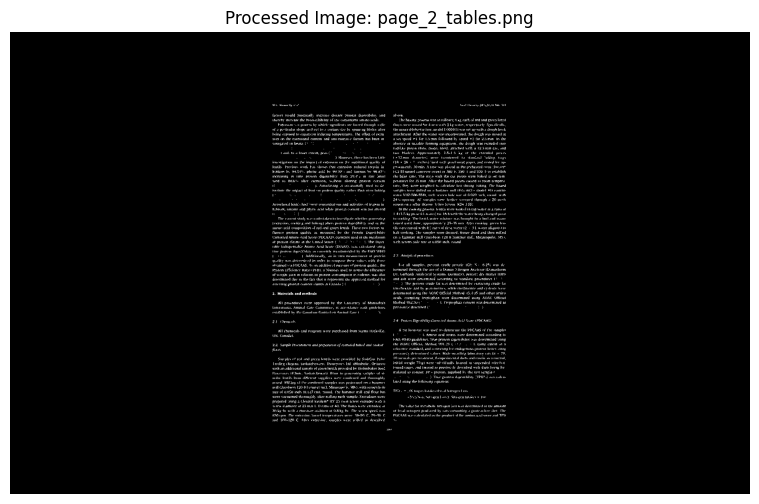

Extracted data: eRe kc AR al

Processing image: /content/enlargeoutput_table/page_5_tables.png


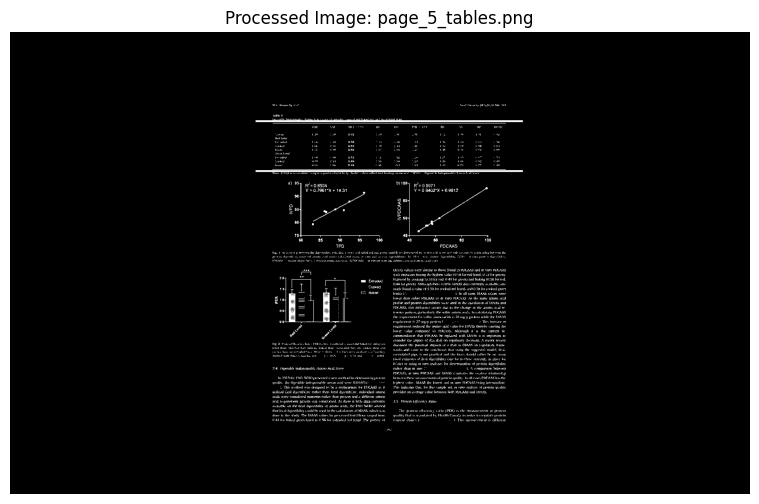

Extracted data: ee
395) eeogsn4 anata
be eer baer
* a
Sas Fi
nl *
rr rr a
10 ao
aa Release ranean tioned
foe f =l i ae Seeman ge etc need
RA o Sahin aes
“ “ eee roe nce naa teri

Processing image: /content/enlargeoutput_table/page_1_tables.png


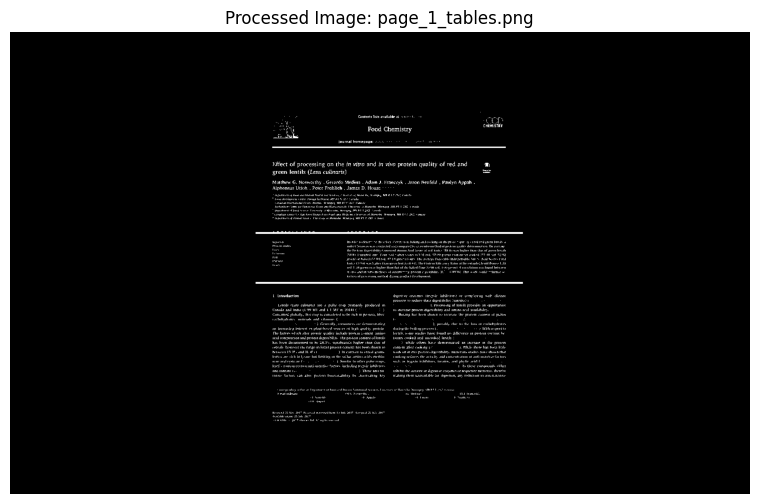

Extracted data: aot Cee ena een
ae Br
oy er Renesticed
Se une ee
ee aero) ea
Se ee ee
ECan Tae cma ee en a ht

Processing image: /content/enlargeoutput_table/page_6_tables.png


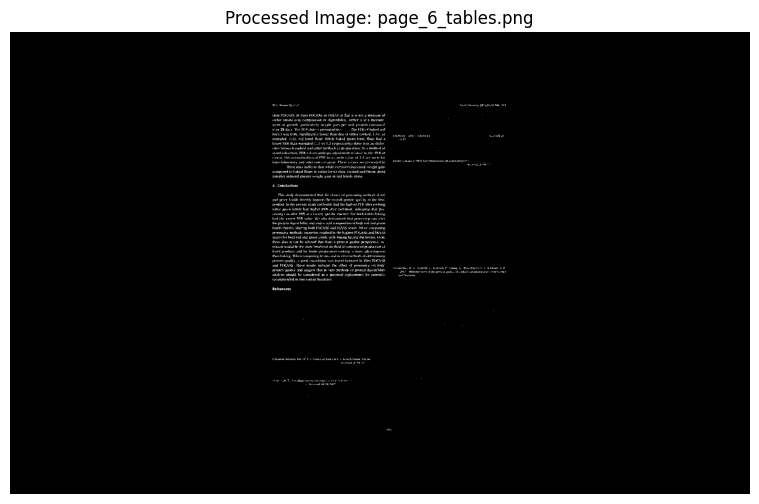

Extracted data: Esieeneaaenes ene Toned
Faerie ene ee nese eh aa

Processing image: /content/enlargeoutput_table/page_4_tables.png


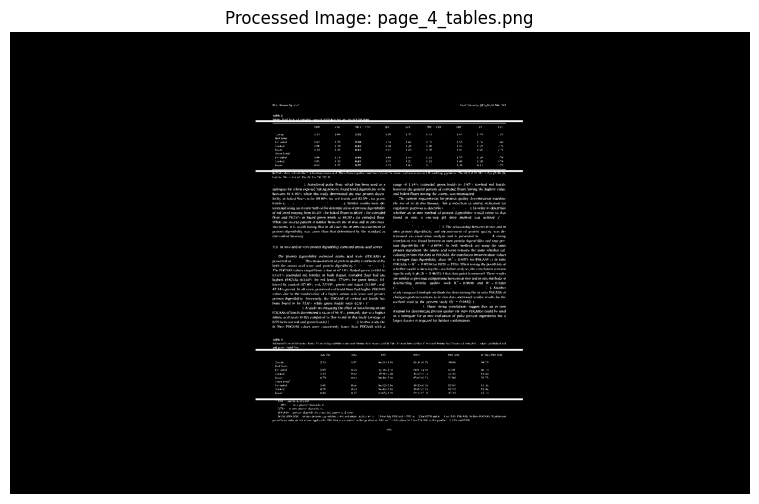

Extracted data: PE MTOR ENN TCT
Se ce ee noe rc Manner art ee intra
Soca neNto eee rc

Processing image: /content/enlargeoutput_table/page_3_tables.png


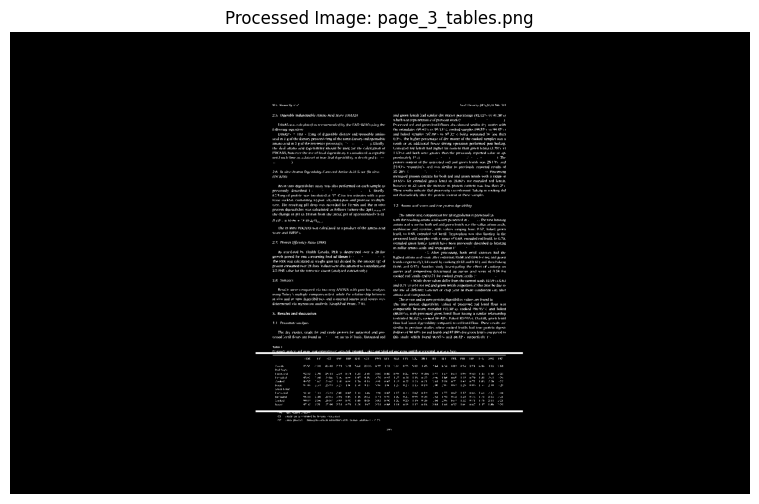

Extracted data: Pena ee eer er em Peter env ENG
ne ert Leora ennai eves sonia acne
Cntr Sass :

Peter ier eseeionele teeth in ve ane ener THe OTe eran Om
ss

No tables matched the required headers.
No valid tables extracted or no data matched the headers.


In [25]:
import pandas as pd
import pytesseract
from PIL import Image
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Amino acid mappings for one-letter to three-letter and full-word to three-letter
amino_acid_mapping = {
    'A': 'ALA', 'C': 'CYS', 'D': 'ASP', 'E': 'GLU', 'F': 'PHE',
    'G': 'GLY', 'H': 'HIS', 'I': 'ILE', 'K': 'LYS', 'L': 'LEU',
    'M': 'MET', 'N': 'ASN', 'P': 'PRO', 'Q': 'GLN', 'R': 'ARG',
    'S': 'SER', 'T': 'THR', 'V': 'VAL', 'W': 'TRP', 'Y': 'TYR',
    'Alanine': 'ALA', 'Cysteine': 'CYS', 'Aspartic Acid': 'ASP',
    'Glutamic Acid': 'GLU', 'Phenylalanine': 'PHE', 'Glycine': 'GLY',
    'Histidine': 'HIS', 'Isoleucine': 'ILE', 'Lysine': 'LYS', 'Leucine': 'LEU',
    'Methionine': 'MET', 'Asparagine': 'ASN', 'Proline': 'PRO',
    'Glutamine': 'GLN', 'Arginine': 'ARG', 'Serine': 'SER',
    'Threonine': 'THR', 'Valine': 'VAL', 'Tryptophan': 'TRP', 'Tyrosine': 'TYR'
}

# Headers you need to include from Excel or PDF
required_headers = [
    'SAMPLE', 'PROTEIN', 'ASP', 'THR', 'SER', 'GLU', 'PRO', 'GLY', 'ALA',
    'CYS', 'VAL', 'MET', 'ILE', 'LEU', 'TYR', 'PHE', 'HIS', 'LYS', 'ARG', 'TRP',
    'AAS', 'TPD', 'TPD Method', 'PDCAAS', 'IVPD', 'IVPD Method', 'IVPDCAAS',
    'RACC', 'PDCAAS Claim', 'IVPDCAAS claim', 'DOI'
]

# Function to map one-letter or full-word amino acids to three-letter codes
def map_to_three_letter(table, mapping):
    for col in table.columns:
        for key, value in mapping.items():
            table[col] = table[col].replace(key, value)
    return table

# Function to extract tables from images using OCR
def extract_tables_from_images(image_paths):
    extracted_tables = []
    for image_path in image_paths:
        print(f"Processing image: {image_path}")

        # Read the image
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)

        # Convert to grayscale and apply thresholding
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY_INV)[1]

        # Display the processed image
        plt.figure(figsize=(10, 6))
        plt.imshow(img_thresh, cmap='gray')
        plt.title(f"Processed Image: {os.path.basename(image_path)}")
        plt.axis('off')
        plt.show()

        # Use pytesseract to extract text from the image
        table_data = pytesseract.image_to_string(img_thresh, config='--psm 6')
        print(f"Extracted data: {table_data}")

        # Check if any data was extracted
        if not table_data.strip():
            print(f"No table data detected in {image_path}")
            continue  # Skip to the next image

        # Split rows and columns to convert into a DataFrame
        rows = [line.split() for line in table_data.split("\n") if line.strip()]
        if rows:
            df = pd.DataFrame(rows)
            extracted_tables.append(df)
        else:
            print(f"No valid rows found in {image_path}")

    return extracted_tables

# Function to filter out tables that match the required headers
def filter_tables_with_headers(tables, headers):
    filtered_tables = []
    for table in tables:
        # Check if the headers from the extracted table match the required headers
        if set(headers).intersection(set(table.columns)):
            filtered_tables.append(table)
    return filtered_tables

# Function to process images and extract mapped tables
def process_images_with_headers(image_paths, mapping, headers):
    tables = extract_tables_from_images(image_paths)

    # Apply the mapping for one-letter or full-word amino acids
    mapped_tables = []
    for table in tables:
        if not table.empty:
            table_mapped = map_to_three_letter(table, mapping)
            mapped_tables.append(table_mapped)

    # Filter tables that match the required headers
    filtered_tables = filter_tables_with_headers(mapped_tables, headers)

    # Combine all filtered tables into a single DataFrame
    if filtered_tables:
        combined_df = pd.concat(filtered_tables, ignore_index=True)
    else:
        print("No tables matched the required headers.")
        combined_df = pd.DataFrame()

    return combined_df

# Path to the folder containing cropped table images
image_folder_path = "/content/enlargeoutput_table"  # Update this with the actual folder path

# Get list of all image file paths in the folder
image_paths = [os.path.join(image_folder_path, file) for file in os.listdir(image_folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))]

# Process images, map amino acid headers, and filter based on required headers
combined_df = process_images_with_headers(image_paths, amino_acid_mapping, required_headers)

if not combined_df.empty:
    # Add DOI column with the path of the research paper
    combined_df['DOI'] = "Path_to_Research_Paper.pdf"

    # Save the final table as an Excel file
    output_excel_path = 'filtered_table_output.xlsx'
    combined_df.to_excel(output_excel_path, index=False)

    print(f"Filtered tables saved to {output_excel_path}")
else:
    print("No valid tables extracted or no data matched the headers.")
